In [37]:
import pandas as pd
import numpy as np

from statsmodels.tsa.statespace.sarimax import SARIMAX

from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

In [38]:
# Download the dataset
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv

--2025-04-14 12:58:50--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45039 (44K) [text/plain]
Saving to: ‘monthly-sunspots.csv.1’

monthly-sunspots.cs 100%[===================>]  43.98K  --.-KB/s    in 0.001s  

2025-04-14 12:58:50 (39.9 MB/s) - ‘monthly-sunspots.csv.1’ saved [45039/45039]



In [39]:
df = pd.read_csv('monthly-sunspots.csv', header=0, index_col=0, parse_dates=True)
df.head()

,Sunspots
Month,
1749-01-01,58.0
1749-02-01,62.6
1749-03-01,70.0
1749-04-01,55.7
1749-05-01,85.0


See [8 - ARMA.ipynb](https://github.com/AhmedBaari/Time-Series/blob/daf697d1d665192628f9ac388227ce14d5001daf/8%20-%20ARMA.ipynb) for EDA.

In [42]:
# Prepare data for SARIMAX
train_data = df['Sunspots'][:250]
test_data = df['Sunspots'][250:]

In [43]:
# Fit the SARIMAX model
model = SARIMAX(train_data, order=(2, 1, 0), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [50]:
predictions = model_fit.predict(start=len(train_data), end=len(df)-1)


In [51]:
# Evaluate the model (example: using RMSE)
rmse = np.sqrt(mean_squared_error(test_data, predictions))
print('Test RMSE: %.3f' % rmse)


Test RMSE: 960.564


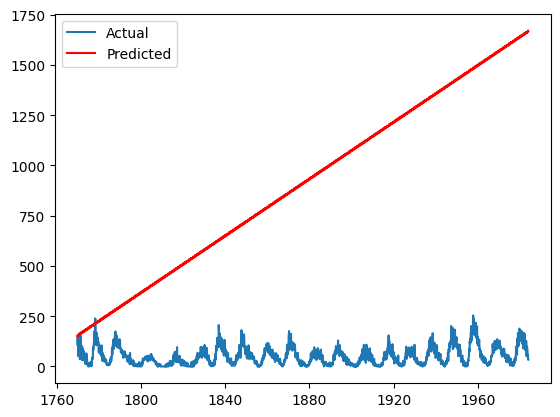

In [52]:
plt.plot(test_data, label='Actual')
plt.plot(predictions, label='Predicted', color='red')
plt.legend()

See [8 - ARMA.ipynb](https://github.com/AhmedBaari/Time-Series/blob/daf697d1d665192628f9ac388227ce14d5001daf/8%20-%20ARMA.ipynb) for residuals and plotting of residuals.